**import libarries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
# Load the train dataset
df=pd.read_csv('Insurance_train_Data.csv')
df

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452


In [3]:
df.shape

(3630, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [5]:
# Exploratory Data Analysis
continuous=[]
categorical=[]
check=[]

d_types=dict(df.dtypes)
for name,type in d_types.items():
    if str(type)=='float64':
        continuous.append(name)
    elif str(type)=='object':
        categorical.append(name)
    else:
        check.append(name)
        
print('continuous features:',continuous)
print('categorical features:',categorical)
print('features to be checked:',check)

continuous features: ['age', 'bmi', 'charges']
categorical features: ['sex', 'smoker', 'region']
features to be checked: ['children']


In [6]:
d_types=dict(df.dtypes)
for name,type in d_types.items():
    if str(type)=='object':
        print(f'<======={name}=======>')
        print(df[name].value_counts())
    

<=======sex=======>
male      2029
female    1601
Name: sex, dtype: int64
<=======smoker=======>
no     3070
yes     560
Name: smoker, dtype: int64
<=======region=======>
southeast    1021
northwest     911
southwest     850
northeast     848
Name: region, dtype: int64


In [7]:
df.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.143527,-0.061076,0.299692
bmi,0.143527,1.000000,-0.041996,0.211325
children,-0.061076,-0.041996,1.000000,-0.075089
charges,0.299692,0.211325,-0.075089,1.000000


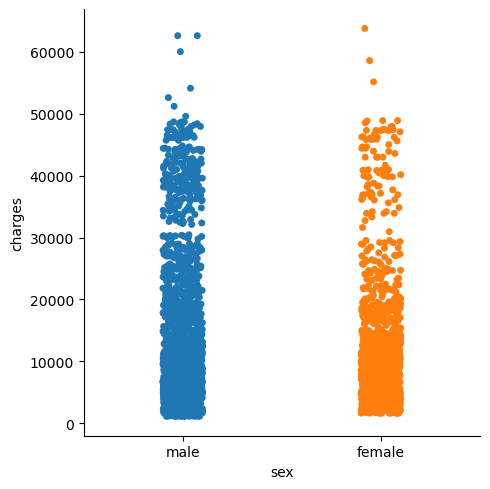

In [9]:
sns.catplot(x='sex',y='charges',data=df)
plt.show()

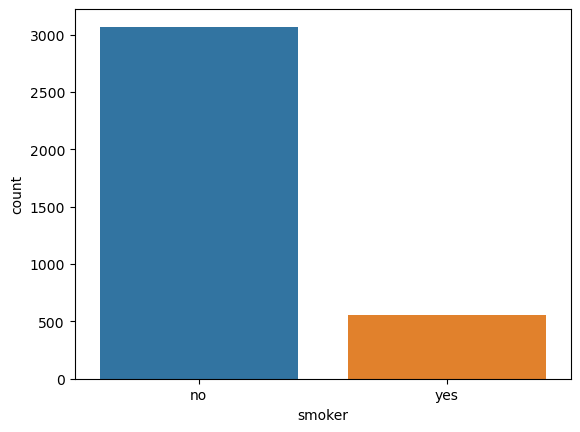

In [10]:
sns.countplot(x=df['smoker'])
plt.show()

In [11]:
# Data Preprocessing
df.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [12]:
df.duplicated().sum()

679

In [13]:
df.drop_duplicates()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
2947,43.000000,male,35.531966,yes,southeast,2,18989.365540
2948,31.374148,male,28.278549,no,northeast,4,21806.181609
2949,50.370750,female,26.766297,no,northwest,4,11355.817586
2950,49.201678,female,31.396840,no,northwest,4,11185.914056


In [14]:
# drop the region column
df.drop('region',axis=1,inplace=True)

In [15]:
# encoding the sex & smoker columns
df['sex'].replace({'female':0,'male':1},inplace=True)
df['smoker'].replace({'no':0,'yes':1},inplace=True)

In [16]:
df

,age,sex,bmi,smoker,children,charges
0,21.000000,1,25.745000,0,2,3279.868550
1,36.976978,0,25.744165,1,3,21454.494239
2,18.000000,1,30.030000,0,1,1720.353700
3,37.000000,1,30.676891,0,3,6801.437542
4,58.000000,1,32.010000,0,1,11946.625900
...,...,...,...,...,...,...
3625,48.820767,0,41.426984,0,4,10987.324964
3626,38.661977,0,26.202557,0,2,11735.844352
3627,56.000000,1,40.300000,0,0,10602.385000
3628,48.061207,0,34.930624,0,1,8976.140452


In [17]:
x=df.drop('charges',axis=1)
y=df['charges']

In [18]:
# train_test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [19]:
#modeling & evaluation
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

#predictions
train_prediction=linear_model.predict(x_train)
test_prediction=linear_model.predict(x_test)

# train & test r2
print('train r2:',linear_model.score(x_train,y_train))
print('test r2:',linear_model.score(x_test,y_test))

#intercept & coefficient values
print('intercept value:',linear_model.intercept_)
print('coefficient values:',linear_model.coef_)

#cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(linear_model,x,y,cv=5)
print(score)
print('cross val score:',score.mean())

train r2: 0.7103894022473263
test r2: 0.7151582391089047
intercept value: -10481.619561694195
coefficient values: [  236.10614035  1167.83903274   283.02391203 22605.65341795
   452.1481908 ]
[0.72259388 0.67980376 0.70816226 0.72062125 0.72594843]
cross val score: 0.7114259147332114


In [20]:
#modeling & evaluation
from sklearn.linear_model import Lasso
lasso_model=Lasso()
lasso_model.fit(x_train,y_train)

#predictions
train_predictions=lasso_model.predict(x_train)
test_predictions=lasso_model.predict(x_test)

#intercept & coefficient values
print('intercept value:',lasso_model.intercept_)
print('coefficient values:',lasso_model.coef_)

# train & test r2
print('train r2:',lasso_model.score(x_train,y_train))
print('test r2:',lasso_model.score(x_test,y_test))

#cross validation score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lasso_model,x,y,cv=5)
print(scores)
scores.mean()

intercept value: -10475.929370901253
coefficient values: [  236.08987551  1164.43004578   283.00003803 22598.09431543
   451.6648211 ]
train r2: 0.7103893010078715
test r2: 0.715123325253967
[0.72257426 0.67984384 0.70815983 0.72064021 0.72591312]


0.7114262519828582

In [21]:
#modeling & evaluation
from sklearn.linear_model import Ridge
ridge_model=Ridge()
ridge_model.fit(x_train,y_train)

#predictions
train_predictions=ridge_model.predict(x_train)
test_predictions=ridge_model.predict(x_test)

#intercept & coefficient values
print('intercept value:',ridge_model.intercept_)
print('coefficient values:',ridge_model.coef_)

# train & test r2
print('train r2:',ridge_model.score(x_train,y_train))
print('test r2:',ridge_model.score(x_test,y_test))

#cross validation score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ridge_model,x,y,cv=5)
print(scores)
scores.mean()

intercept value: -10469.487973102576
coefficient values: [  236.1750103   1171.72231211   283.05492386 22535.81792114
   449.37074309]
train r2: 0.7103839459979582
test r2: 0.7149624459963269
[0.72249489 0.67998956 0.70818275 0.72068629 0.72578312]


0.7114273225620089

In [22]:
#modeling & evaluation
from sklearn.linear_model import ElasticNet
ElasticNet_model=ElasticNet()
ElasticNet_model.fit(x_train,y_train)

#predictions
train_predictions=ElasticNet_model.predict(x_train)
test_predictions=ElasticNet_model.predict(x_test)

#intercept & coefficient values
print('intercept value:',ElasticNet_model.intercept_)
print('coefficient values:',ElasticNet_model.coef_)

# train & test r2
print('train r2:',ElasticNet_model.score(x_train,y_train))
print('test r2:',ElasticNet_model.score(x_test,y_test))

#cross validation score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ElasticNet_model,x,y,cv=5)
print(scores)
scores.mean()

intercept value: -6602.336410651049
coefficient values: [ 246.97793643  848.7693202   291.39784458 4627.01359672 -166.0116682 ]
train r2: 0.342397270131772
test r2: 0.3354580691978728
[0.36023098 0.32799155 0.33479102 0.35027324 0.32951585]


0.3405605272488292

In [23]:
final_test_scores=pd.DataFrame({'Models':['linear_model','lasso_model','ridge_model','ElasticNet_model'],
                               'Test_r2':[linear_model.score(x_test,y_test)*100,
                                          lasso_model.score(x_test,y_test)*100,
                                          ridge_model.score(x_test,y_test)*100,
                                          ElasticNet_model.score(x_test,y_test)*100,]})
final_test_scores

,Models,Test_r2
0,linear_model,71.515824
1,lasso_model,71.512333
2,ridge_model,71.496245
3,ElasticNet_model,33.545807


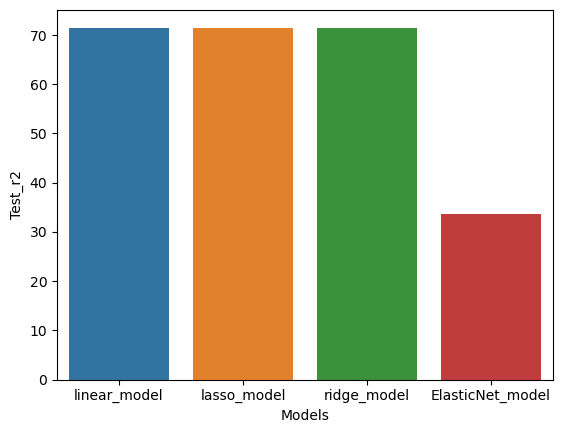

In [24]:
# visualize the accuracies after randomundersampling of models wise
sns.barplot(final_test_scores['Models'],final_test_scores['Test_r2'])
plt.show()

**out of the all models linear model gives you the best test_r2 and thie is the base model for regression**

**check the Assumptions of the Linear Model**

In [25]:
#Linearity of errors
test_res=y_test-test_prediction

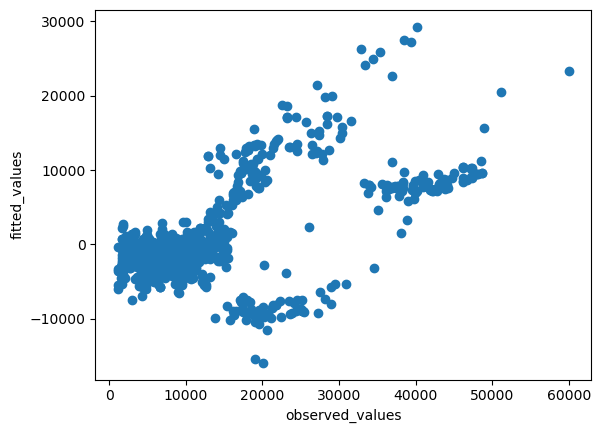

In [26]:
plt.scatter(y_test,test_res)
plt.xlabel('observed_values')
plt.ylabel('fitted_values')
plt.show()

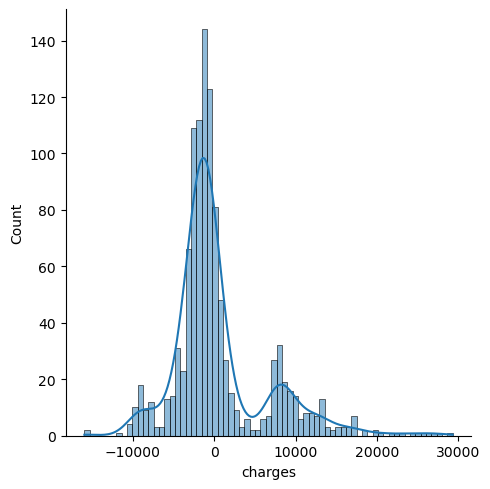

In [27]:
#normality of errors
sns.displot(test_res,kde=True)
plt.show()

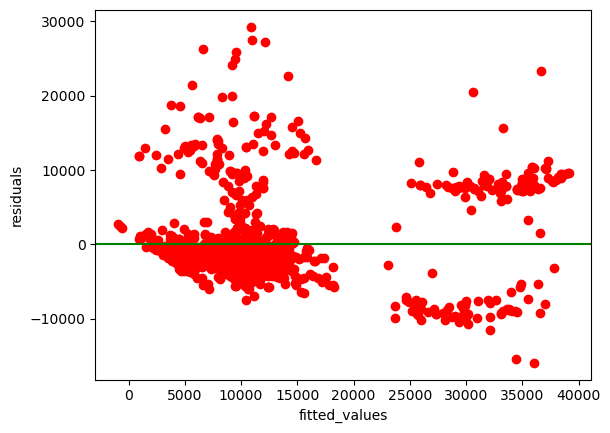

In [28]:
#equal variance of errors
plt.scatter(test_prediction,test_res,c='r')
plt.axhline(y=0,color='green')
plt.xlabel('fitted_values')
plt.ylabel('residuals')
plt.show()

In [29]:
#variable significance
import statsmodels.formula.api as smf
model1=smf.ols('y~x',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     1796.
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:21:21   Log-Likelihood:                -36583.
No. Observations:                3630   AIC:                         7.318e+04
Df Residuals:                    3624   BIC:                         7.321e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.071e+04    633.323    -16.907      0.000   -1.19e+04   -9465.585
x[0]         241.9618      8.062     30.013      0.000     226.156     257.768
x[1]        1379.3869    198.232      6.958      0.000     990.729    1768.045
x[2]         277.7319     17.799     15.604      0.000     242.836     312.628
x[3]          2.3e+04    271.441     84.727      0.000    2.25e+04    2.35e+04
x[4]         502.1294     57.698      8.703      0.000     389.005     615.254
==============================================================================
Omnibus:                      987.076   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2895.474
Skew:                           1.405   Prob(JB):                         0.00
Kurtosis:                       6.354   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#prediction on the new data
linear_model.predict([[21.000000,1,25.745000,0,2]])

array([3835.19541532])